In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

image preprocessing

In [5]:

def plot_samples(images, labels, num_samples=8):
    plt.figure(figsize=(6, 6))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {np.argmax(labels[i])}")
    plt.tight_layout()

neural network

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),        
    Dense(128, activation='relu'),        
    Dropout(0.4),                         
    Dense(64, activation='relu'),        
    Dense(10, activation='softmax')
    ])  

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


backward propogation and training 

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, batch_size=13, validation_split=0.1)

Epoch 1/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8344 - loss: 0.5311 - val_accuracy: 0.9672 - val_loss: 0.1163
Epoch 2/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9387 - loss: 0.2011 - val_accuracy: 0.9713 - val_loss: 0.0950
Epoch 3/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9507 - loss: 0.1604 - val_accuracy: 0.9743 - val_loss: 0.0882
Epoch 4/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9565 - loss: 0.1409 - val_accuracy: 0.9772 - val_loss: 0.0792
Epoch 5/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9593 - loss: 0.1294 - val_accuracy: 0.9787 - val_loss: 0.0767
Epoch 6/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9619 - loss: 0.1217 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 7/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9660 - loss: 0.1100 - val_accuracy: 0.9783 - val_loss: 0.0760
Epoch 8/8
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9661 - loss: 0.1100 - 

saving the model

In [8]:
model.save('traing.h5')

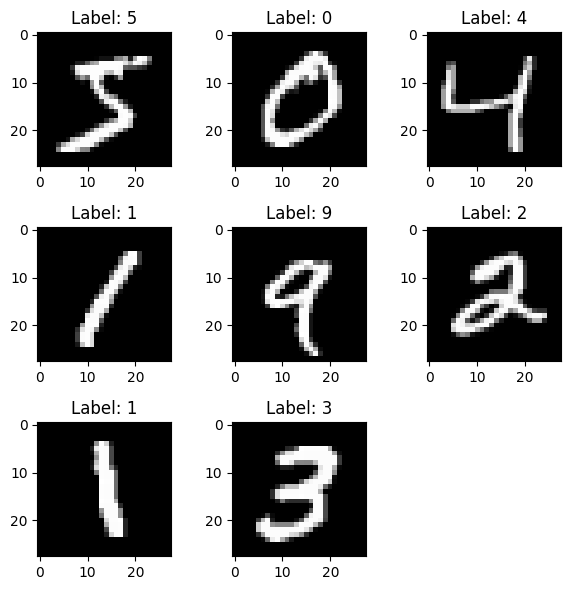

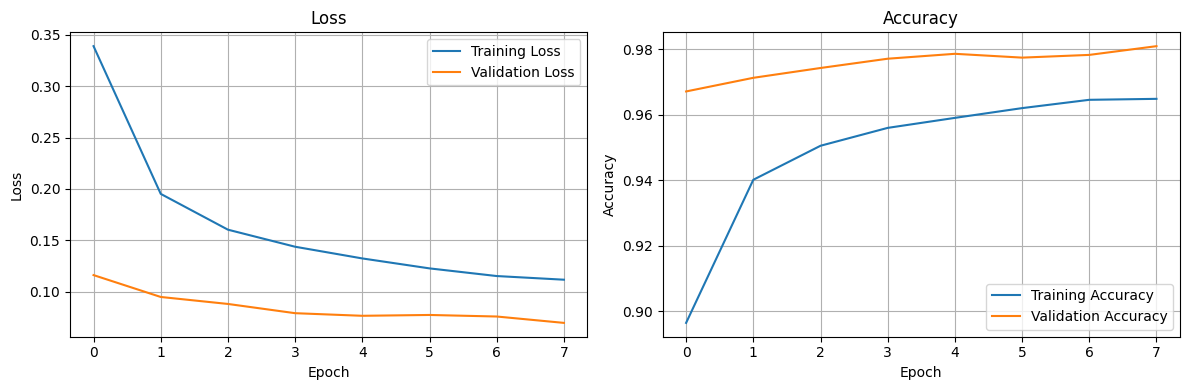

In [9]:
def plot_training_history(history):
  plot_samples(x_train, y_train)

  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.title('Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend()
  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)

  plt.tight_layout()
plot_training_history(history)
plt.show()


In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
model = load_model('traing.h5')
image_path = 'D:\\coding\\5.png'
img = load_img(image_path, target_size=(28, 28), color_mode="grayscale")  
img_array = img_to_array(img) / 255.0 
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
print("Predictions:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predictions: 5


In [11]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]
